<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_5/Assignment5_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5.1
Zachariah Freitas

## Linear Classification

Install the package mlextend: http://rasbt.github.io/mlxtend/installation/ <br>

Import libraries.

In [32]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import tarfile
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import SGDClassifier
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions
from mlxtend.evaluate import bootstrap_point632_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=matplotlib.cbook.mplDeprecation)

# Python Linter
#!pip install pycodestyle pycodestyle_magic
#!pip install flake8
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


Next, you will do a few exercises to visualize the difference between the different linear classifiers.

Generate classification data using make_classification from sklearn.datasets:

`X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)`

In [33]:
# %%pycodestyle # Python Linter
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           random_state=1,
                           n_clusters_per_class=1)

print('X Data Review:\n', X[:5])
print('\nY Data Review:\n', y[:5])

X Data Review:
 [[-1.04948638  0.8786438 ]
 [ 0.8780991   0.89551051]
 [ 0.95928819  1.03967316]
 [-1.18013412  1.12062155]
 [-0.90731836  1.06040861]]

Y Data Review:
 [1 0 0 1 1]


Use SGDClassifier to train classifiers using different loss functions: log, hinge, and perceptron. Visualize the trained classifiers using `plot_decision_regions(X, y, clf=model, legend=2)` from the mlextend package. Plot the decision region for each of the three loss functions: a sample plot for hinge loss appears below.

**SGD Classifier - Log Loss**

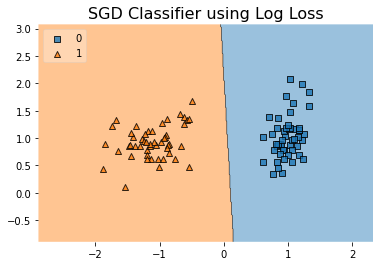

In [34]:
# %%pycodestyle # Python Linter

sgdclf_log = SGDClassifier(loss='log').fit(X, y)
# Plot graph using instruction above
plot_decision_regions(X, y, clf=sgdclf_log, legend=2)
plt.title('SGD Classifier using Log Loss', size=16)
plt.show()

**SGD Classifier - Hinge Loss**

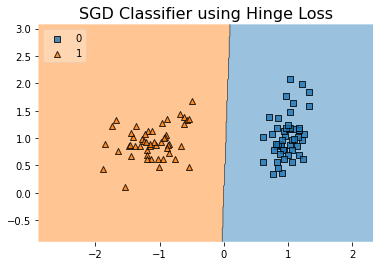

In [35]:
# %%pycodestyle # Python Linter

sgdclf_hinge = SGDClassifier(loss='hinge').fit(X, y)
# Draw plot here
plot_decision_regions(X, y, clf=sgdclf_hinge, legend=2)
plt.title('SGD Classifier using Hinge Loss', size=16)
plt.show()

**SGD Classifier - Perceptron**

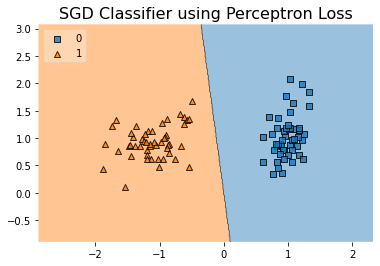

In [36]:
# %%pycodestyle # Python Linter

sgdclf_perc = SGDClassifier(loss='perceptron').fit(X, y)
# Draw plot here
plot_decision_regions(X, y, clf=sgdclf_perc, legend=2)
plt.title('SGD Classifier using Perceptron Loss', size=16)
plt.show()

Now, create a larger classification dataset. You will use cross_val_score from scikit-learn and
compare this to bootstrap_scores from mlextend.
Set up the simulated data as follows:

`X, y = make_classification(n_samples=10000,n_features=20, n_redundant=0, n_informative=20,random_state=1,n_clusters_per_class=1)`

In [37]:
# Create Dataset using description above.
# %%pycodestyle # Python Linter
X, y = make_classification(n_samples=10000,
                           n_features=20,
                           n_redundant=0,
                           n_informative=20,
                           random_state=1,
                           n_clusters_per_class=1)

print('X Data Review:\n', X[:5])
print('\nY Data Review:\n', y[:5])

X Data Review:
 [[ 1.06460426 -5.9282953   6.14595461  0.74601925 -2.45431139  2.63954225
  -2.94346402 -5.00301173  0.0478375  -0.99593198  2.14338604  3.12274666
   1.39157957  3.48634096 -2.0399121  -2.22097964 -0.60863797  0.063803
  -4.98939136  1.00242768]
 [-0.54593793  0.79506324 -2.29880048  0.47313515 -1.77284017  1.12690474
  -0.95919302 -2.97795541 -1.69065421  0.84674564 -0.50947172  1.01834072
  -3.30398299 -1.15480457  3.45497122 -3.96662102  4.50085085  0.13688882
  -1.07258261  0.06783055]
 [-1.27622708 -1.15214808  2.90574769  1.46938864  0.1926348  -4.09308035
  -5.6886958  -2.20296396 -6.05815987 -2.53696895  1.45282517  2.71610233
  -1.4386305   2.3736082   1.84370022 -1.83578165  0.31698638 -0.71003512
   3.65414089  0.56820653]
 [ 2.06458431 -3.72162184  0.98004198 -0.6909682  -1.33809224 -0.29364528
  -1.06797023  1.71403833 -2.95835107 -3.68026893  0.0351619  -1.16616927
   2.2521748  -0.59746888 -4.66363464  3.539467    2.01531949  3.02625697
   0.32615205  0.

With your classifier in a variable called model (using SGDClassifier, as before), you can get the
accuracies as follows:

```
scores = cross_val_score(model, X, y, cv=5,scoring=scoring)
bootstrap_scores = bootstrap_point632_score(model, X, y, method='oob')
```

Create a table with the average of each cross-validation score and the average of the bootstrap
scores.

In [38]:
# Here is a recommanded loop to create models
# %%pycodestyle # Python Linter
loss_f = ['log', 'hinge', 'perceptron']
scores_list = []
avg_list = []
for i, loss in enumerate(loss_f):
  sgdclfs = SGDClassifier(loss=loss)
  cv = cross_val_score(sgdclfs, X, y, cv=5, scoring='accuracy') # cross_val_score is created here
  bs = bootstrap_point632_score(sgdclfs, X, y, method='oob') # bootstrap is created here
  scores_list.append({'model': loss, 'cv': cv, 'bs': bs}) # append loss as 'model', cv as 'cv' and bs as 'bs'
  avg_list.append({'Model': loss, 'Average Cross Validation': cv.mean(), 'Average Bootstrap': bs.mean()}) # append loss, cv.mean(), bs.mean() with apropriate column names

**Table of Average cross-validation/bootstrap scores**

In [39]:
pd.DataFrame(avg_list)

,Model,Average Cross Validation,Average Bootstrap
0,log,0.9002,0.901873
1,hinge,0.8986,0.895406
2,perceptron,0.8740,0.873171


In [40]:
scores_df = pd.DataFrame(scores_list)
scores_df

,model,cv,bs
0,log,"[0.905, 0.899, 0.909, 0.8905, 0.8975]","[0.9080932784636488, 0.9114825979720471, 0.903..."
1,hinge,"[0.8915, 0.8995, 0.9105, 0.896, 0.8955]","[0.8967391304347826, 0.902312925170068, 0.9055..."
2,perceptron,"[0.889, 0.8795, 0.8795, 0.8495, 0.8725]","[0.8902077151335311, 0.8675675675675676, 0.869..."


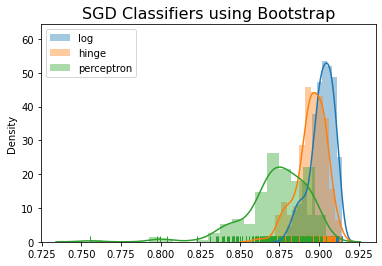

In [41]:
#Use sns to plot hinge, log and perceptron. Remember they are all stored in scores_list['bs']

for target in scores_list:
  sns.distplot(target['bs'], hist=True, rug=True, label=target['model'])
                 
plt.title('SGD Classifiers using Bootstrap', size=16)
plt.legend()
plt.show()

Finally, you will look at the importance of setting the regularization parameter. Create a database
with only two informative features:

`X, y = make_classification(n_samples=1000,n_features=2000, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)`

In [42]:
#Create X and y here
X, y = make_classification(n_samples=1000,
                           n_features=2000,
                           n_redundant=0,
                           n_informative=2,
                           random_state=1,
                           n_clusters_per_class=1)

print('X Data Review:\n', X[:5])
print('\nY Data Review:\n', y[:5])

X Data Review:
 [[ 0.72449649  1.42764745 -1.22952259 ...  0.19157381 -0.75267059
   0.7283777 ]
 [-1.06216581 -0.83039059 -1.21718872 ...  0.14143685 -1.5930176
  -0.2391367 ]
 [ 0.27884552  1.31018457 -0.58385186 ... -0.90775873 -0.33590257
  -1.4111209 ]
 [ 1.26752075  0.78497535 -1.27059612 ... -0.38110492 -1.19868103
  -0.60957997]
 [-1.74172752 -0.91016544  1.52787128 ... -0.67246388 -2.15466316
   0.50307096]]

Y Data Review:
 [0 1 0 1 1]


Train a regularized classifier using ‘log’ as the loss function. Try both types of regularization ‘l1’ and ‘l2’ and sweep alpha over a range from: [0.0001,0.001,0.01,0.1,1,10,100,1000]. Use fivefold cross-validation to measure accuracy. Create a table of accuracy indexed by alpha, and use this table to plot the accuracy for both types of regularization. 

In [43]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
for a in alphas:
  l1clf = SGDClassifier(loss='log', penalty='l1', alpha=a) #Classifier with loss='log', penalty='l1', alpha=a, Then fit it on X and y
  l2clf = SGDClassifier(loss='log', penalty='l2', alpha=a) #Classifier with loss='log', penalty='l2', alpha=a, Then fit it on X and y
  l1cv = cross_val_score(l1clf, X, y, cv=5, scoring='accuracy') # Compute cross_val_score for l1clf, cv=5, scoring='accuracy' and mean
  l2cv = cross_val_score(l2clf, X, y, cv=5, scoring='accuracy') # Compute cross_val_score for l2clf, cv=5, scoring='accuracy' and mean
  results.append({'alpha': a, 'log L1': l1cv.mean(), 'log L2': l2cv.mean()})

**Accuracy Table by alpha value**

In [44]:
#Create a dataframe of results and store it here
reg_df = pd.DataFrame(results)
reg_df

,alpha,log L1,log L2
0,0.0001,0.655,0.666
1,0.0010,0.659,0.665
2,0.0100,0.721,0.652
3,0.1000,0.891,0.668
4,1.0000,0.503,0.684
5,10.0000,0.499,0.505
6,100.0000,0.499,0.499
7,1000.0000,0.501,0.503


**L1/L2 Regularization Accuracy Plot**

Your plot should look like this:

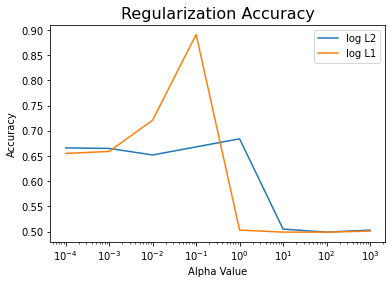

In [45]:
sns.lineplot(data=reg_df, x="alpha", y="log L2", label="log L2")
sns.lineplot(data=reg_df, x="alpha", y="log L1", label="log L1")
                 
plt.title('Regularization Accuracy', size=16)
plt.legend()
plt.gca().set_ylabel('Accuracy')
plt.gca().set_xlabel('Alpha Value')
plt.gca().set_xscale("log")
plt.show()

**3 Large Scale Linear Classification**
Next, you will use data from a dataset of movie reviews. Unzip the data in aclImdb_v1.tar.

There are several formats of data here, but one simple way to load the data into python is to load
the files individually into a python list, and then use tfidfVectorizer to convert the reviews into bag
of words feature files. Make sure to use pd.DataFrame.sparse.from_spmatrix to make a dataframe
from the word features.
Now, you will use fivefold cross-validation to look at the effect of the regularization penalty on
accuracy. You should be able to simply adapt your code from the earlier section with simulated
data to work on this real data. Note that due to the larger size of this text data, this section will
take several minutes or more to run.

for alpha in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]: for penalty in [‘l1’,‘l2’]

**3.1 Download Dataset**

https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Since you run the assignment on Google Colab, you don't need to bother extracting all the text
files from the tarball. The following cells just reads all the filenames in a dataframe and you will have
7
code iterating the training and test files, reading the text into a list and appending labels into a
dataframe and the dataframes are constructed. 

In [46]:
import urllib.request
# Download tar.gz file
urllib.request.urlretrieve('https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz', 'aclImdb_v1.tar.gz')

('aclImdb_v1.tar.gz', <http.client.HTTPMessage at 0x7f94568a3250>)

In [47]:
tar = tarfile.open("aclImdb_v1.tar.gz", "r:gz")
file_df = pd.DataFrame([m.name for m in tar.getmembers()], columns=['filename'])
# Paths
train_neg = 'aclImdb/train/neg/'
train_pos = 'aclImdb/train/pos/'
test_neg = 'aclImdb/test/neg/'
test_pos = 'aclImdb/test/pos/'

**Training Dataset**

In [48]:
# This part of code creates train data
# Running this part takes quite some time
files = file_df[file_df['filename'].str.startswith(train_neg)]['filename'].tolist()
neglist = []
for file in files:
  f = tar.extractfile(file)
  if f is not None:
    neglist.append(f.read().decode("utf-8"))
files = file_df[file_df['filename'].str.startswith(train_pos)]['filename'].tolist()
poslist = []
for file in files:
  f = tar.extractfile(file)
  if f is not None:
    poslist.append(f.read().decode("utf-8"))
train_neg_df = pd.DataFrame(list(zip(neglist, np.zeros(len(neglist)))),columns=['text', 'labels'])
train_pos_df = pd.DataFrame(list(zip(poslist, np.ones(len(poslist)))),columns=['text', 'labels'])
training = pd.concat([train_neg_df, train_pos_df], ignore_index=True)

In [49]:
training.head()

,text,labels
0,I rented I AM CURIOUS-YELLOW from my video sto...,0.0
1,"""I Am Curious: Yellow"" is a risible and preten...",0.0
2,If only to avoid making this type of film in t...,0.0
3,This film was probably inspired by Godard's Ma...,0.0
4,"Oh, brother...after hearing about this ridicul...",0.0


**Test Dataset**

In [50]:
# Use similar strategy to create testing data
# This part of code creates test data
# Running this part takes quite some time
files = file_df[file_df['filename'].str.startswith(test_neg)]['filename'].tolist()
neglist = []
for file in files:
  f = tar.extractfile(file)
  if f is not None:
    neglist.append(f.read().decode("utf-8"))
files = file_df[file_df['filename'].str.startswith(test_pos)]['filename'].tolist()
poslist = []
for file in files:
  f = tar.extractfile(file)
  if f is not None:
    poslist.append(f.read().decode("utf-8"))
test_neg_df = pd.DataFrame(list(zip(neglist, np.zeros(len(neglist)))),columns=['text', 'labels'])
test_pos_df = pd.DataFrame(list(zip(poslist, np.ones(len(poslist)))),columns=['text', 'labels'])
testing = pd.concat([test_neg_df, test_pos_df], ignore_index=True)

In [51]:
testing.head()

,text,labels
0,I love sci-fi and am willing to put up with a ...,0.0
1,"Worth the entertainment value of a rental, esp...",0.0
2,its a totally average film with a few semi-alr...,0.0
3,STAR RATING: ***** Saturday Night **** Friday ...,0.0
4,"First off let me say, If you haven't enjoyed a...",0.0


**3.2 Vectorizer - bag of words**

In [52]:
vectorizer = TfidfVectorizer()
spmat = vectorizer.fit_transform(training['text'])
feat_names = vectorizer.get_feature_names()
Xtrain = pd.DataFrame.sparse.from_spmatrix(spmat, columns=feat_names)
ytrain = training['labels']

**SGD Classifier - Log Loss L1 Regularization & Log Loss L2 Regularization**

In [53]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
for a in alphas:
  #Create SGDClassifier with loss of 'log', penalty of 'l1' and proper alpha=a then fit it on (Xtrain, ytrain)
  l1clf = SGDClassifier(loss='log', penalty='l1', alpha=a) 
  l2clf = SGDClassifier(loss='log', penalty='l2', alpha=a) 
  print('Finished training, alpha=%f' % a)
  #Create cross_val_score with l1clf for Xtrain and  ytrain with cv=5 'accuracy' as scoring='accuracy' it is good to define n_jobs to make it faster and compute the mean at the end
  l1cv = cross_val_score(l1clf, Xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-1) 
  l2cv = cross_val_score(l2clf, Xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-1) 
  print('Finished 5-fold CV, alpha=%f' % a)
  # append 'alpha' and 'log L1'
  results.append({'alpha': a, 'log L1': l1cv.mean(), 'log L2': l2cv.mean()})

l1_l2_acc = pd.DataFrame(results)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [54]:
l1_l2_acc.head()

,alpha,log L1,log L2
0,0.00001,0.85536,0.85924
1,0.00010,0.85432,0.86060
2,0.00100,0.73480,0.82160
3,0.01000,0.50000,0.77844
4,0.10000,0.50000,0.64456


**L1/L2 Accuracy Plot**

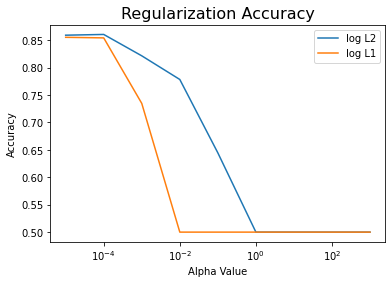

In [55]:
# Create an appropriate plot of L1/L2. remember to put legend and proper title
sns.lineplot(data=l1_l2_acc, x="alpha", y="log L2", label="log L2")
sns.lineplot(data=l1_l2_acc, x="alpha", y="log L1", label="log L1")
                 
plt.title('Regularization Accuracy', size=16)
plt.legend()
plt.gca().set_ylabel('Accuracy')
plt.gca().set_xlabel('Alpha Value')
plt.gca().set_xscale("log")
plt.show()